## importing the packages 

In [1]:
# to load data from csv file
import pandas as pd 
# to visualize our plots and to resize it
import matplotlib.pyplot as plt  
# to make plots 
import seaborn as sns 
# to perform Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering 
# for the dendogram
import scipy.cluster.hierarchy as sch  
# for scaling 
from sklearn.preprocessing import StandardScaler 
# to perform a kmedoids clustering 
from sklearn_extra.cluster import KMedoids 
# to visualize our plots
%matplotlib inline  
# counting the occurrence of the classes 
import collections
# to convert the list to array 
import numpy as np 

**Feature Description**

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

Income: Net income per person

Inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

In [2]:
# loading the data from the csv file
country_data = pd.read_csv('Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**making sure that the data are clean**

In [3]:
#there is no null data
country_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**getting some relations about features**


In [6]:
relation_data = country_data.drop(['country'],axis=1)
relation_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Figure size 288x288 with 0 Axes>

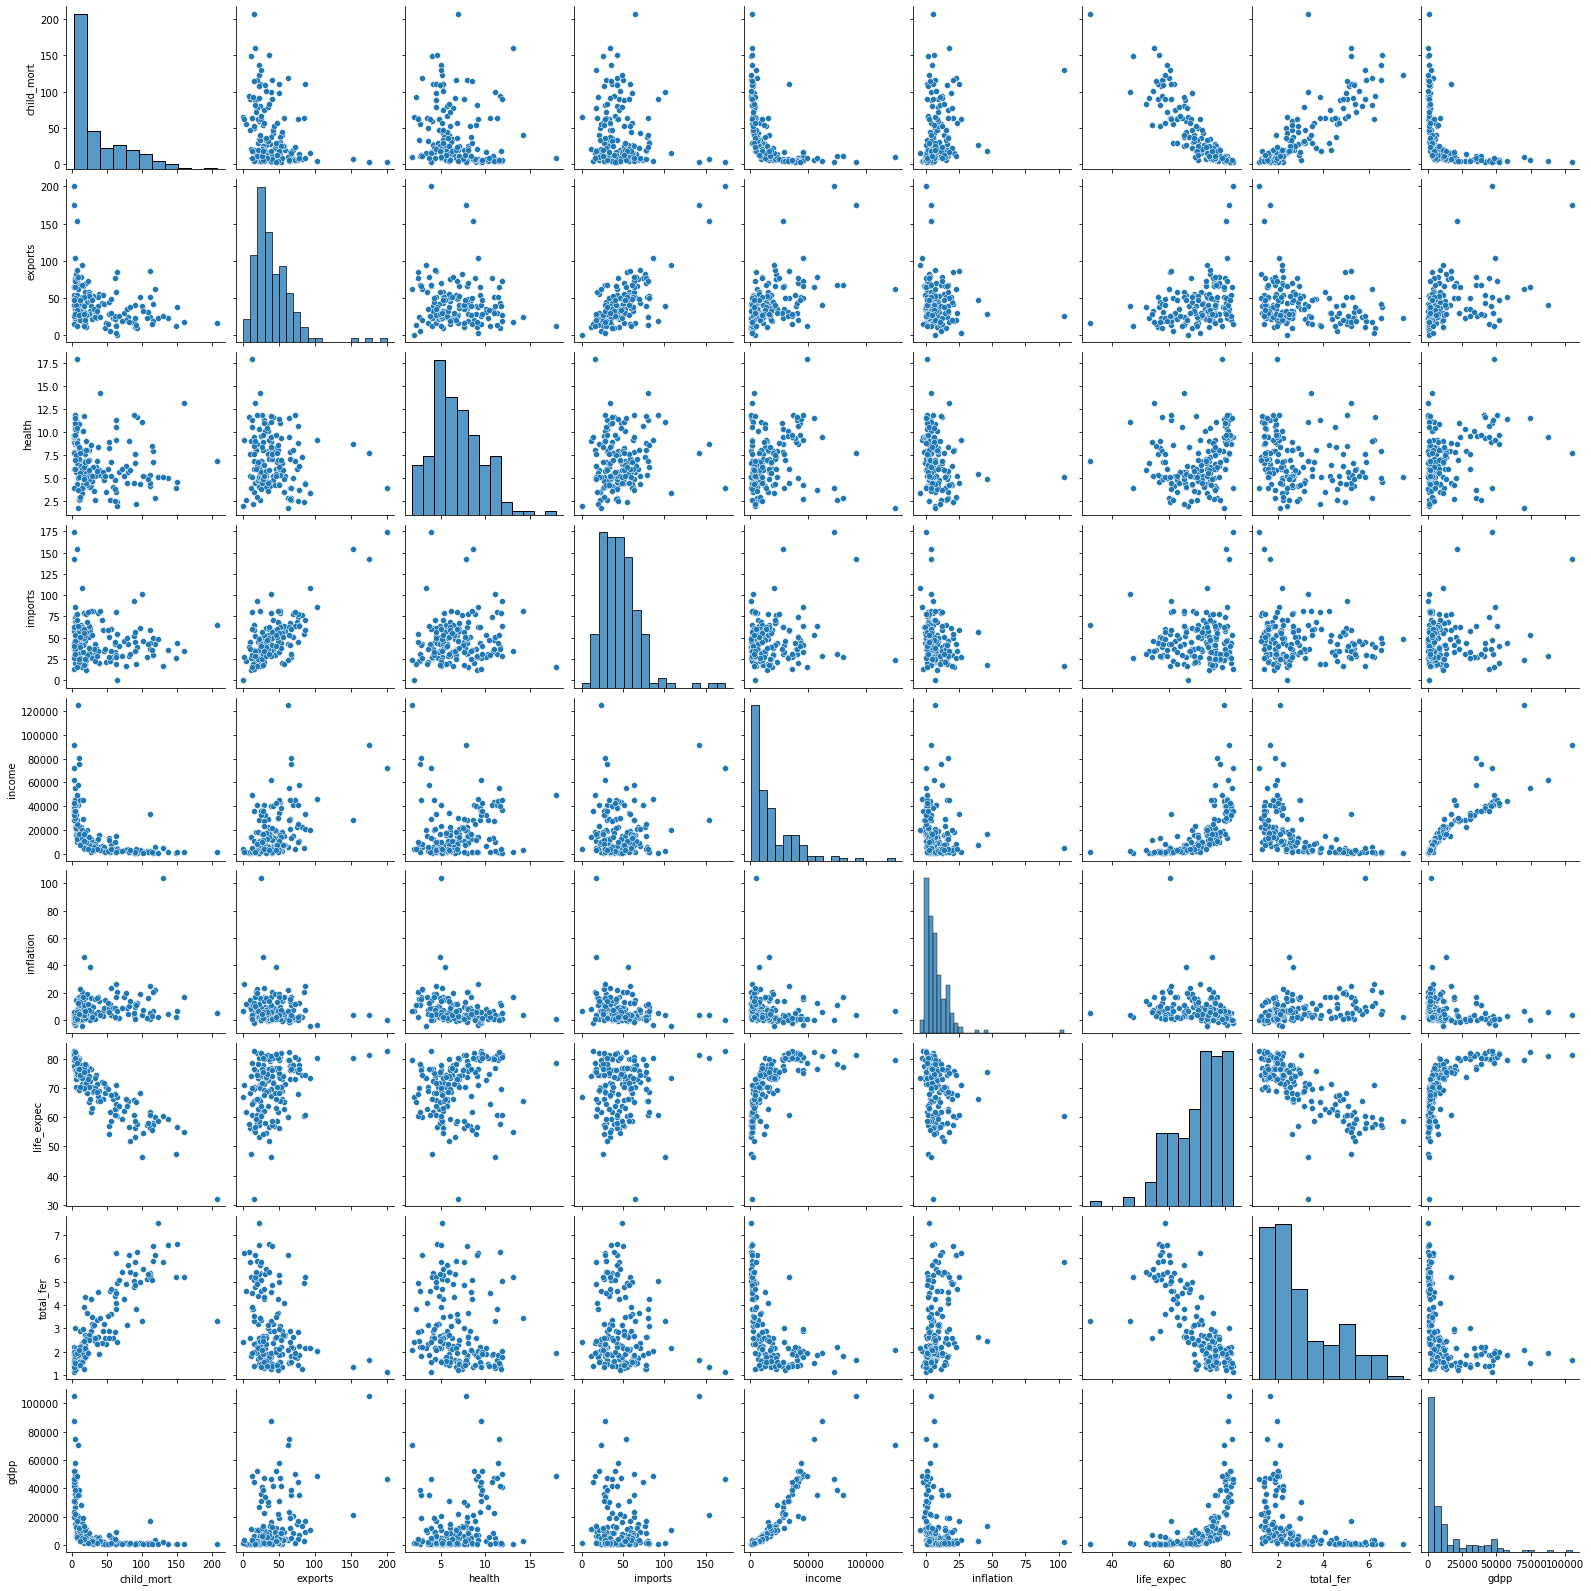

In [7]:
# a scatterplot between each column and the others  and histplot for the marginal plots along the diagonal. *pairplot*
plt.figure(figsize = (4,4))
sns.pairplot(relation_data)
plt.show()

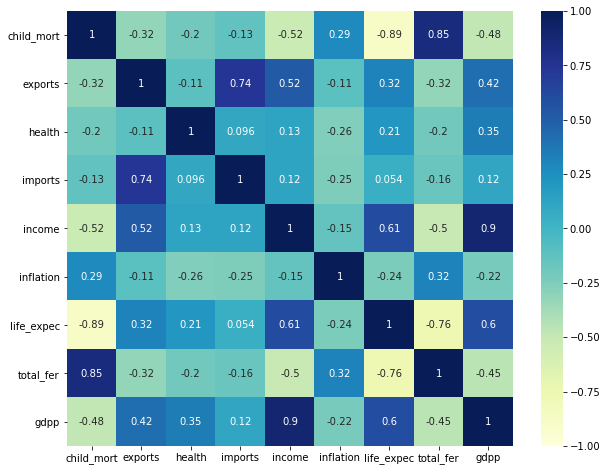

In [8]:
# performing a heatmap to see the relations between each other  
plt.figure(figsize=(10,8))
corr_data = relation_data.corr()
sns.heatmap(corr_data,vmin=-1,vmax=1,annot = True,cmap="YlGnBu")
plt.show()

we can conclude from this 2 plots that :

-->child_mort and total_fer , income and gdpp , exports and imports have a highly positive correlation

-->life_expec and child_mort , life_expec and total_fer have a highly negative correlation 

## scaling the data 

In [9]:
scaling=StandardScaler()
scaled=scaling.fit_transform(relation_data)
scaled_df=pd.DataFrame(scaled,columns=relation_data.columns)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## hierarchial clustering

In [10]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
Class_single = hierarchial_clustering.fit_predict(relation_data)
print(Class_single)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


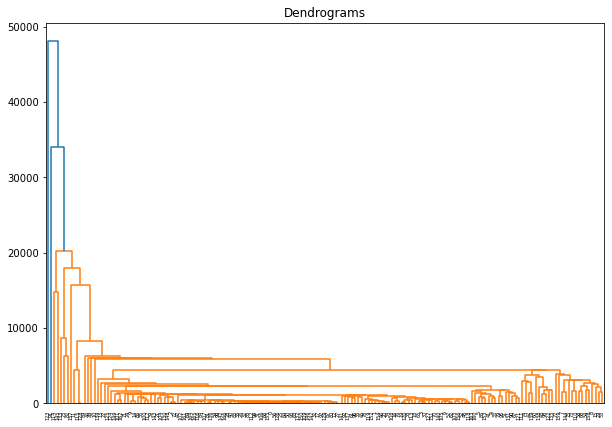

In [11]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(relation_data, method='single'))

We can see that single linkage clustering is not promising since most of the data points are clustered in single cluster label and only few data points are in remaining clusters. Lets proceed further to check the complete linkage

In [12]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
Class_complete = hierarchial_clustering.fit_predict(relation_data)
print(Class_complete)


[2 2 2 2 2 2 2 1 1 2 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1
 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1
 1 2 2 0 1 2 2 2 2 2 2 1 0 2 2 2 2 1 2 2 2 2 1 2 1 2 2 1 1 2 2 2 2 1 0 2 2
 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2]


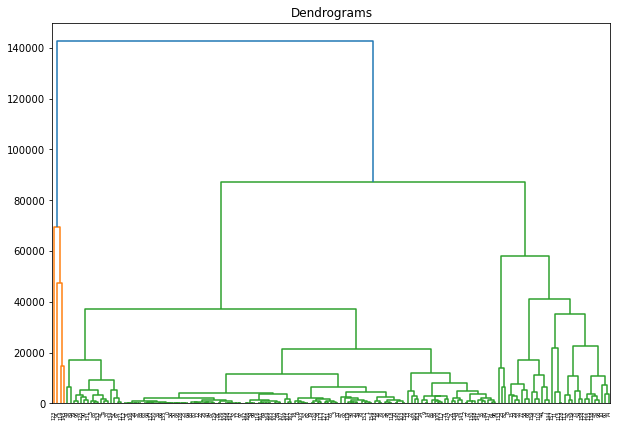

In [13]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(relation_data, method='complete'))

complete is better , but we can improve it 

In [14]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
Class_ward = hierarchial_clustering.fit_predict(relation_data)
print(Class_ward)

[2 2 2 2 1 1 2 0 0 2 1 1 2 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 1 2 2 2
 2 2 2 2 1 1 1 0 2 2 2 2 1 2 1 2 0 0 2 2 2 0 2 1 2 2 2 2 2 2 1 0 2 2 2 2 0
 1 0 2 0 2 1 2 2 0 2 2 1 2 2 2 1 1 0 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 1 2 2 0 1 2 2 2 2 2 1 1 0 2 1 2 2 1 2 2 1 2 0 1 1 2 2 1 1 2 2 2 2 0 0 2 2
 2 2 2 2 2 1 2 2 2 0 0 0 1 2 2 1 2 2 2]


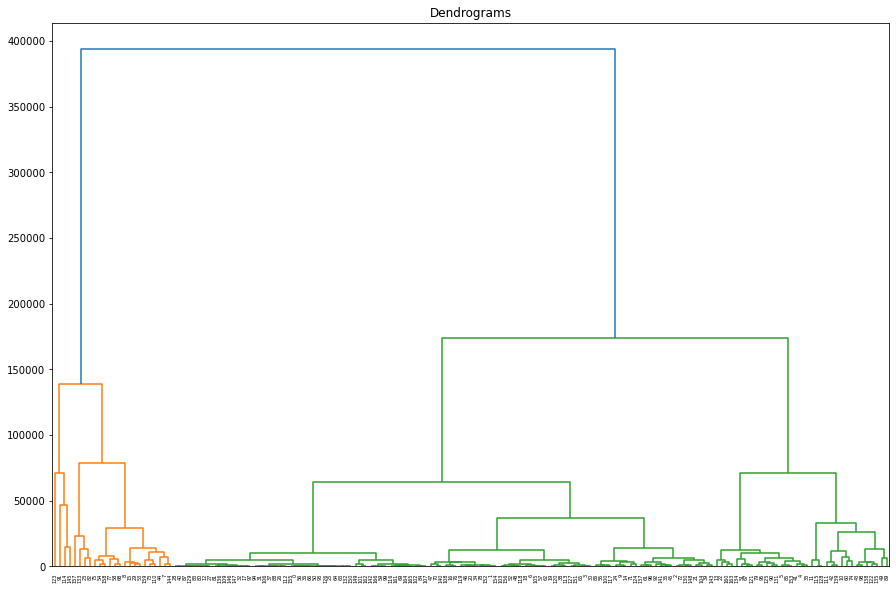

In [15]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(relation_data, method='ward'))

we can see that ward is much better than the 2 other methods **"single","complete"** . so we will depend on the **"ward"** method 

In [16]:
#counting the occurrence of the classes
import collections
collections.Counter(Class_ward)

Counter({2: 108, 1: 35, 0: 24})

### we want to clarify that class 0 is the highest class and class 2 is the neediest class

# visualizing the results of hierarchial algorithm

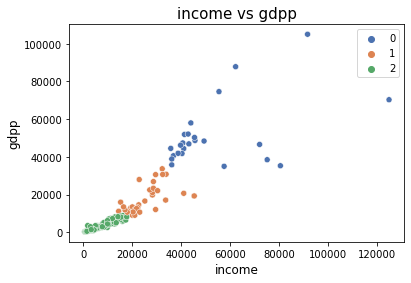

In [17]:
# a scatterplot between "gdpp" and "income" with colored classes 
sns.scatterplot(x=relation_data['income'],y= relation_data['gdpp'],hue= Class_ward,palette="deep")
plt.title("income vs gdpp", fontsize=15)
plt.xlabel("income", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

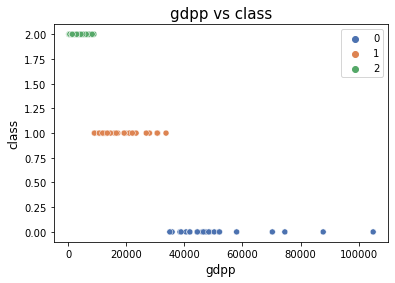

In [18]:
# a scatterplot between "class" and "gdpp" with colored classes
sns.scatterplot(x=relation_data['gdpp'],y=Class_ward,hue=Class_ward,palette="deep")
plt.title("gdpp vs class", fontsize=15)
plt.xlabel("gdpp", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

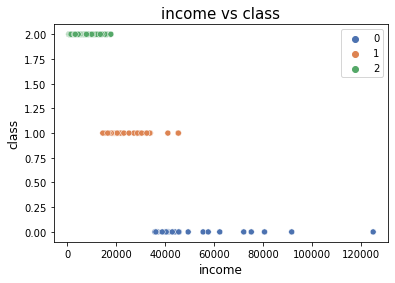

In [19]:
# a scatterplot between "class" and "income" with colored classes 
sns.scatterplot(x=relation_data['income'],y=Class_ward,hue=Class_ward,palette="deep")
plt.title("income vs class", fontsize=15)
plt.xlabel("income", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

**We can see that with low GDP per capita we have the minimum income**

**and the countries in cluster 2 are in this area with low income and low gdpp**

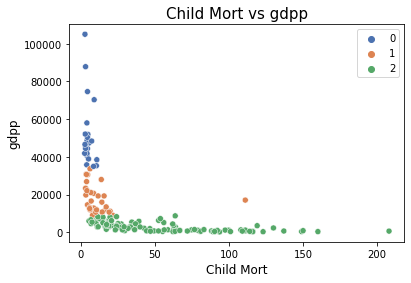

In [20]:
# a scatterplot between "gdpp" and "child_mort" with colored classes 
sns.scatterplot(x=relation_data['child_mort'],y=relation_data['gdpp'],hue=Class_ward,palette="deep")
plt.title("Child Mort vs gdpp", fontsize=15)
plt.xlabel("Child Mort", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

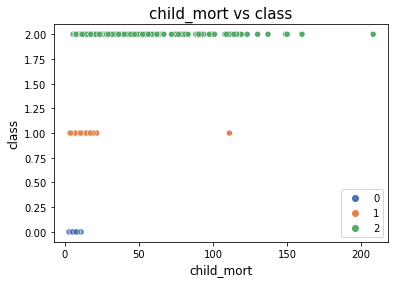

In [21]:
# a scatterplot between "class" and "child_mort" with colored classes 
sns.scatterplot(x=relation_data['child_mort'],y=Class_ward,hue=Class_ward,palette="deep")
plt.title("child_mort vs class", fontsize=15)
plt.xlabel("child_mort", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

**We can see that with low GDP per capita we have the highest percentage of child mort**

**and countries in cluster 2 have the smallest percentage of GDP per capita and the highest child mort**

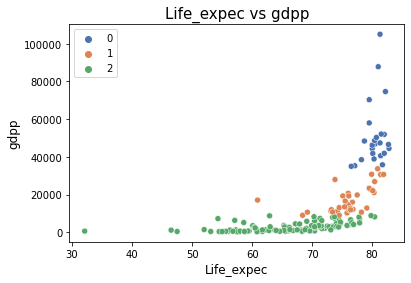

In [22]:
# a scatterplot between "gdpp" and "life_expec" with colored classes 
sns.scatterplot(x=relation_data['life_expec'],y=relation_data['gdpp'],hue=Class_ward,palette="deep")
plt.title("Life_expec vs gdpp", fontsize=15)
plt.xlabel("Life_expec", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

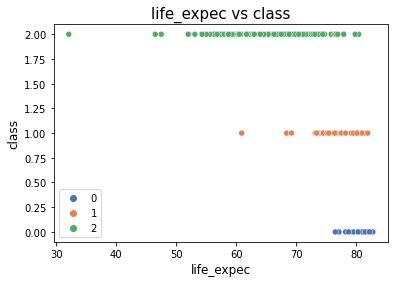

In [23]:
# a scatterplot between "class" and "life_expec" with colored classes 
sns.scatterplot(x=relation_data['life_expec'],y=Class_ward,hue=Class_ward,palette="deep")
plt.title("life_expec vs class", fontsize=15)
plt.xlabel("life_expec", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

**we can see that the average of the life expec is very low in class 2 from other clusters**

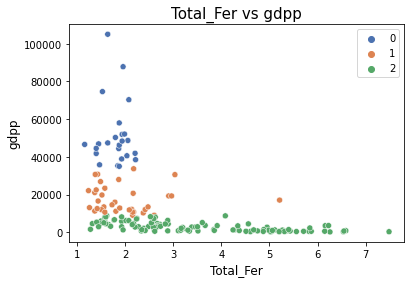

In [24]:
# a scatterplot between "gdpp" and "total_fer" with colored classes
sns.scatterplot(x=relation_data['total_fer'],y=relation_data['gdpp'],hue=Class_ward,palette="deep")
plt.title("Total_Fer vs gdpp", fontsize=15)
plt.xlabel("Total_Fer", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

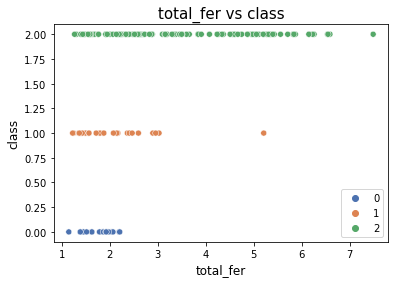

In [25]:
# a scatterplot between "class" and "total_fer" with colored classes
sns.scatterplot(x=relation_data['total_fer'],y=Class_ward,hue=Class_ward,palette="deep")
plt.title("total_fer vs class", fontsize=15)
plt.xlabel("total_fer", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

**we can see that total_fer is bigger in class 2 and most likely this is because of ignorance**

## K-medoids clustering

In [26]:
cluster = KMedoids(n_clusters=3, metric="manhattan",init="random",random_state=1) 
Class_KM= cluster.fit_predict(relation_data)
print(Class_KM)

[0 0 1 0 1 1 0 2 2 1 1 2 0 1 1 2 0 0 0 0 0 1 1 2 1 0 0 0 0 2 0 0 0 1 0 1 0
 0 0 1 0 1 2 1 2 1 0 0 0 1 0 1 0 2 2 1 0 0 2 0 2 1 0 0 0 0 0 1 2 0 0 1 1 2
 2 2 0 2 0 1 0 0 2 0 0 1 1 0 0 1 1 2 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 2
 2 0 0 2 2 0 1 0 1 0 1 1 2 1 1 0 0 2 0 1 1 0 2 1 1 0 1 1 2 0 1 0 1 2 2 0 0
 1 0 0 0 0 1 0 0 0 2 2 2 1 0 0 1 0 0 0]


In [27]:
#counting the occurrence of the classes
collections.Counter(Class_KM)

Counter({0: 83, 1: 52, 2: 32})

### **we want to clarify  that class 2 is the highest class and class 0 is the neediest class**

# visualizing the results of K-Medoids algorithm

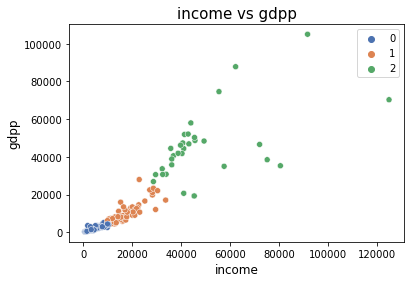

In [28]:
# a scatterplot between "gdpp" and "income" with colored classes 
sns.scatterplot(x=relation_data['income'],y= relation_data['gdpp'],hue=Class_KM ,palette="deep")
plt.title("income vs gdpp", fontsize=15)
plt.xlabel("income", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

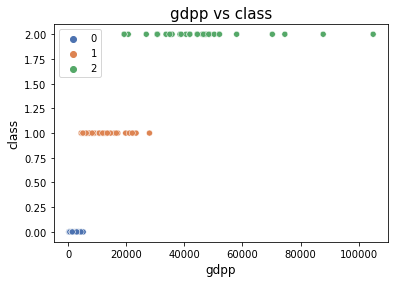

In [29]:
# a scatterplot between "class" and "gdpp" with colored classes
sns.scatterplot(x=relation_data['gdpp'],y=Class_KM,hue=Class_KM,palette="deep")
plt.title("gdpp vs class", fontsize=15)
plt.xlabel("gdpp", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

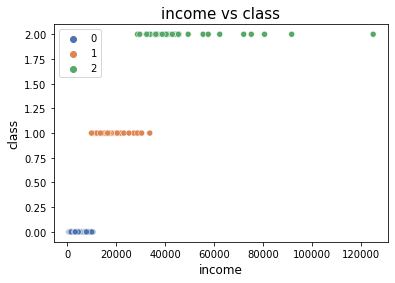

In [30]:
# a scatterplot between "class" and "income" with colored classes
sns.scatterplot(x=relation_data['income'],y=Class_KM,hue=Class_KM,palette="deep")
plt.title("income vs class", fontsize=15)
plt.xlabel("income", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

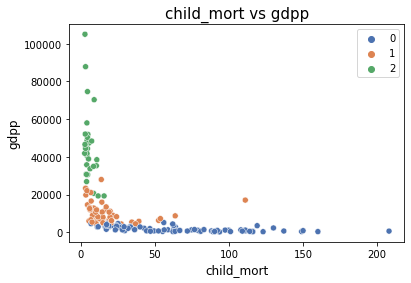

In [31]:
# a scatterplot between "gdpp" and "child_mort" with colored classes 
sns.scatterplot(x=relation_data['child_mort'],y= relation_data['gdpp'],hue=Class_KM ,palette="deep")
plt.title("child_mort vs gdpp", fontsize=15)
plt.xlabel("child_mort", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

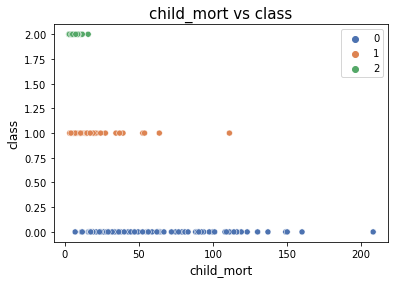

In [32]:
# a scatterplot between "class" and "child_mort" with colored classes
sns.scatterplot(x=relation_data['child_mort'],y=Class_KM,hue=Class_KM,palette="deep")
plt.title("child_mort vs class", fontsize=15)
plt.xlabel("child_mort", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

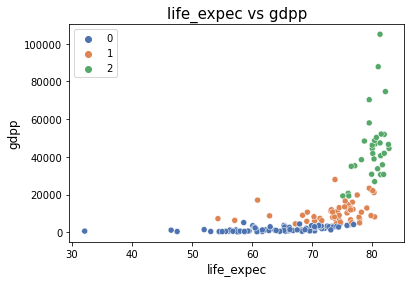

In [33]:
# a scatterplot between "gdpp" and "life_expec" with colored classes 
sns.scatterplot(x=relation_data['life_expec'],y= relation_data['gdpp'],hue=Class_KM ,palette="deep")
plt.title("life_expec vs gdpp", fontsize=15)
plt.xlabel("life_expec", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

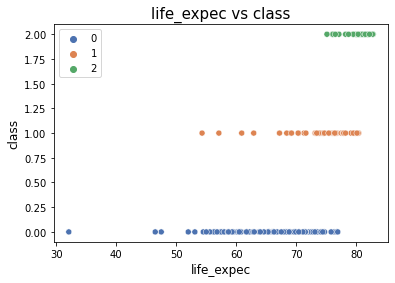

In [34]:
# a scatterplot between "class" and "life_expec" with colored classes
sns.scatterplot(x=relation_data['life_expec'],y=Class_KM,hue=Class_KM,palette="deep")
plt.title("life_expec vs class", fontsize=15)
plt.xlabel("life_expec", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

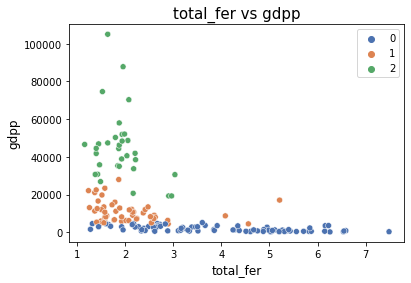

In [35]:
# a scatterplot between "gdpp" and "total_fer" with colored classes 
sns.scatterplot(x=relation_data['total_fer'],y= relation_data['gdpp'],hue=Class_KM ,palette="deep")
plt.title("total_fer vs gdpp", fontsize=15)
plt.xlabel("total_fer", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

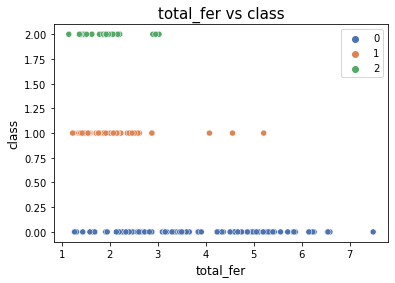

In [36]:
# a scatterplot between "class" and "total_fer" with colored classes
sns.scatterplot(x=relation_data['total_fer'],y=Class_KM,hue=Class_KM,palette="deep")
plt.title("total_fer vs class", fontsize=15)
plt.xlabel("total_fer", fontsize=12)
plt.ylabel("class", fontsize=12)
plt.show()

### from the previous plots we can see that the K-Medoids algorithm have the same insighs as hierarchical algorithm 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

##### since we can see from the clusters of the two algorithms , the k-medoids has the most realistic clusters and numbers of countries in each cluster  , so  we will depend on k-medoids clustering to help  the HELP organization to find the countries that really need help 

In [37]:
#append the class_KM col to the original dataset 
country_data['KM_class'] = Class_KM
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [38]:
# so this is the list of countries that really need help 
import numpy as np 
np.array(country_data.query('KM_class==0')['country'])

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Bangladesh',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'China', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Ecuador',
       'Egypt', 'El Salvador', 'Eritrea', 'Fiji', 'Gambia', 'Georgia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'India', 'Indonesia', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Niger', 'Nigeria', 'Pakistan', 'Paraguay', 'Philippines',
       'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'To